# Advanced ML: Домашнее задание 2

## Васькин Дмитрий

Это задание связано с анализом конкретного датасета, в котором, надеюсь, понадобится то, чему мы с вами до сих пор научились. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko). Но любые комментарии, новые идеи и рассуждения на тему в этом ноутбуке категорически приветствуются. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data


### Задание 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [1]:
!curl -L https://covid.ourworldindata.org/data/owid-covid-data.csv -o owid-covid-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 37 2400k   37  912k    0     0   912k      0  0:00:02  0:00:01  0:00:01  648k
 83 2400k   83 2015k    0     0  1007k      0  0:00:02  0:00:02 --:--:--  832k
100 2400k  100 2400k    0     0  1200k      0  0:00:02  0:00:02 --:--:--  872k


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('owid-covid-data.csv')

In [4]:
df['date'] = pd.to_datetime(df.date, format = '%Y-%m-%d').dt.date

In [5]:
df = df.loc[(df.location=='Russia') & (df.date >= pd.to_datetime('2020-03-03'))]
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
13775,RUS,Russia,2020-03-03,3,1,0,0,0.021,0.007,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13776,RUS,Russia,2020-03-04,4,1,0,0,0.027,0.007,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13777,RUS,Russia,2020-03-05,4,0,0,0,0.027,0.000,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13778,RUS,Russia,2020-03-06,4,0,0,0,0.027,0.000,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13779,RUS,Russia,2020-03-07,10,6,0,0,0.069,0.041,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05


In [6]:
df.loc[(df.new_cases == 0, 'new_cases')] = 1

In [7]:
df['date_No'] = np.arange(len(df.date))

In [8]:
df.sort_values(by=['date'], inplace=True)
df_train = df[:50]
df_test = df[50:]

In [9]:
df_train.shape, df_test.shape

((50, 30), (23, 30))

### Задание 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

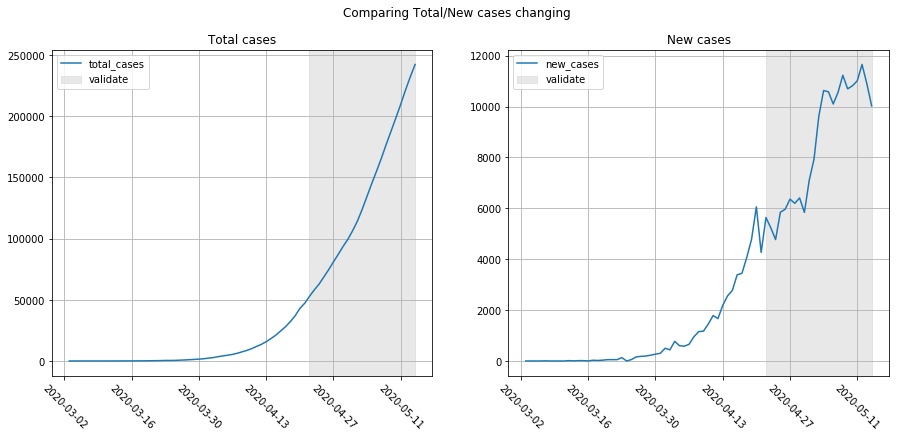

In [10]:
fig, axs = plt.subplots(figsize=(15,6),nrows=1, ncols=2, sharex=True)

fig.suptitle('Comparing Total/New cases changing')
df1 = df.set_index('date')
axs[0].set_title('Total cases')
axs[0].plot(df1.total_cases)
axs[0].set_xticklabels(df.date, rotation=-45)
axs[0].axvspan(df.date.iloc[df_train.shape[0]], df.date.iloc[df.shape[0]-1], alpha=0.5, label = 'validate', 
               color='lightgrey')
axs[0].grid()
axs[0].legend()

axs[1].set_title('New cases')
axs[1].plot(df1.new_cases)
axs[1].axvspan(df.date.iloc[df_train.shape[0]], df.date.iloc[df.shape[0]-1], alpha=0.5, label = 'validate', 
               color='lightgrey')
axs[1].grid()
axs[1].legend()
plt.xticks(rotation=-45)
plt.show()

А) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [11]:
lr = LinearRegression()
lr.fit(df_train[['date_No']], np.exp(df_train[['date_No']]))
preds = lr.predict(df_test[['date_No']])

In [12]:
df.date.iloc[df_train.shape[0]-1], df.date.iloc[df.shape[0]-1]

(datetime.date(2020, 4, 21), datetime.date(2020, 5, 14))

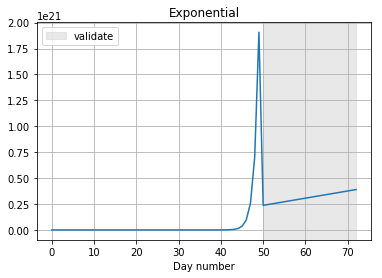

In [13]:
plt.plot(df.date_No, np.concatenate((np.array(np.exp(df_train[['date_No']])),(np.array(preds))), axis=0))
plt.axvspan(df.date_No.iloc[df_train.shape[0]], df.date_No.iloc[df.shape[0]-1], alpha=0.5, label = 'validate', 
               color='lightgrey')
plt.title('Exponential')
plt.xlabel('Day number')
plt.legend()
plt.grid()

In [14]:
lr.intercept_

array([-1.09463534e+20])

In [15]:
lr.coef_

array([[6.93106494e+18]])

In [16]:
pr = pd.DataFrame({'day': ['1st may', '1st jun', '1st sep'], 'date_No': [59, 90, 182]})
pr['predict'] = lr.predict(pr[['date_No']])
pr['predict (billions)'] = lr.predict(pr[['date_No']]) / 1000000000
pr

,day,date_No,predict,predict (billions)
0,1st may,59,2.994693e+20,2.994693e+11
1,1st jun,90,5.143323e+20,5.143323e+11
2,1st sep,182,1.151990e+21,1.151990e+12
